In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
#cargar datos
import os 
ruta=os.getcwd()
archivo=os.listdir(ruta+'/EMG_data_for_gestures-master')
serie1=[] #guardar en matriz tridimensional? para no tener dos series por aparte
serie2=[]
for i in archivo[0:-1]: #ignora el readme
    v=os.listdir(ruta+'/EMG_data_for_gestures-master'+'/'+i)
    x1=np.loadtxt(ruta+'/EMG_data_for_gestures-master'+'/'+i+'/'+v[0],skiprows=1,delimiter='\t',usecols=range(0,9))
    x2=np.loadtxt(ruta+'/EMG_data_for_gestures-master'+'/'+i+'/'+v[1],skiprows=1,delimiter='\t',usecols=range(0,9))
    serie1.append(x1)
    serie2.append(x2)
serie1=np.array(serie1,dtype=object)
serie2=np.array(serie2,dtype=object)
#serie1[0] -->Serie 1 del primer sujeto y no carga la columna class porque el ultimo dato de la serie 1 del sujeto 34 le falta el valor (creo que es por eso)
#se podría arreglar skipeando también la última fila

1. Crear una función que reciba la señal de EMG y permita aplicar el operador Teager-Kaiser Energy Operator (TKEO).

In [48]:
def tkeo(data): 
    x=data*1
    x[1:-1]=np.square(x[1:-1])-np.multiply(x [0:-2],x[2:]) #aplica la función para todos los datos menos el primero y el último, que no es un problema (describir en análisis)
    return x

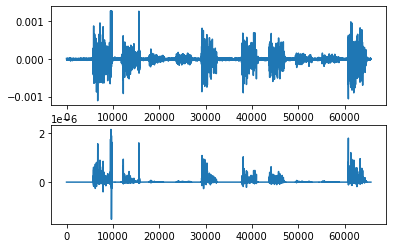

In [172]:
#esta es una casilla para probar cosas :)
tkeo_channel_1=tkeoall(serie1[0])
ts=serie1[0][:,0]
plt.subplot(211)
plt.plot(ts,serie1[0][:,1]) #canal 1 sujeto 1
plt.subplot(212)
plt.plot(ts[1:-1],tkeo_serie1[0][:,0][1:-1])
#plt.axis([t[0],t[-1],np.min(tkeo_channel_1[1:-1]),np.max(tkeo_channel_1[1:-1])])
#np.shape(tkeo_channel_1)

2. Crear una función que reciba una señal EMG de múltiples canales y calcule el operador TKEO para cada canal.

In [163]:
def tkeoall(xdata): #se le entrega la matriz incluyendo la columna del tiempo (no la de class)
    data=xdata[:,1:]*1
    tkeoforchannel=np.apply_along_axis(tkeo,0,data)
    return tkeoforchannel #saca un array donde tkeoall(data)[0] es el primer canal

3. Crear una función que reciba una señal EMG de múltiples canales que extraiga las siguientes características para cada canal (10 %):
   -  RMS
   -  Varianza
   -  Mean Absolute Value
   -  Mean Absolute Value Slope
   -  Slope Sign Changes
   -  Wave form length
   -  Zero Crossing

In [6]:
def rms(x): #x es un array
    x_squared=np.square(x)
    x_mean=np.mean(x_squared)
    xrms=np.sqrt(x_mean)
    return xrms

In [198]:
#funcion
def caracteristicas(xdata): 
    carac_canales=[]
    for i in range(0,np.shape(xdata)[1]): #tal vez se pueda usar apply_along_axis para calcular todas
        xx=data[:,i]
        xrms=rms(xx) #root mean square
        xvar=np.var(xx) #varianza
        xmav=np.mean(np.abs(data)) #mean absolute value
        xmavs=np.mean(np.abs(np.diff(data))) #mean absolute value slope
        derivative = np.diff(data)
        xssc = np.sum(np.diff(np.sign(derivative)) != 0) #Slope sign changes
        diff_abs = np.abs(np.diff(data))
        xwl = np.sum(diff_abs) #waveform length
        xzc = len(np.where(np.diff(np.sign(data)))[0]) #zero crossings
        carac_canal_actual=[xrms,xvar,xmav,xmavs,xssc,xwl,xzc]
        carac_canales.append(carac_canal_actual)
    return np.array(carac_canales)
#caracteristicas(serie1[0])[0]


4. Crear una rutina que aplique sobre todo los archivos de la base de datos las funciones descritas en 2 y 3 (5 %)

In [210]:
#tkeo_sujetos=np.apply_along_axis(tkeoall,0,serie1) por algún motivo, esto no funciona. Y es una lástima
tkeo_serie1=[]
for i in range(0,np.shape(serie1)[0]):
    tkeo_serie1.append((tkeoall(serie1[i]))) 
carac_tkeo_serie1=[] #carac_tkeo_serie2[0][0] primer sujeto, primer canal
for i in range(0,len(tkeo_serie1)):
    carac_tkeo_serie1.append((caracteristicas(tkeo_serie1[i])))
    #carac_serie1[0][0] -->valores para el primer canal de la primera serie del primer sujeto

In [204]:
#ahora lo mismo, pero para la serie 2
tkeo_serie2=[]
for i in range(0,np.shape(serie2)[0]):
    tkeo_serie2.append((tkeoall(serie2[i]))) 
carac_tkeo_serie2=[] #carac_tkeo_serie2[0][0] primer sujeto, primer canal
for i in range(0,len(tkeo_serie2)):
    carac_tkeo_serie2.append((caracteristicas(tkeo_serie2[i])))

5. Crear una rutina que aplique sobre todo los archivos de la base de datos las función 3 sobre las señales originales

In [216]:
carac_serie1=[]
for i in range(0,len(serie1)):
    carac_serie1.append((caracteristicas(serie1[i])))
carac_serie2=[] #carac_serie[0][0] sujeto 1,canal1
for i in range(0,len(serie2)):
    carac_serie2.append((caracteristicas(serie2[i])))

Almacene las métricas obtenidas en el ítem 4 y 5 en un dataframe, en donde haya una columna que discrimine si las características provienen de una señal con TKEO o sin TKEO.

Realice un análisis exploratorio de los datos (Estadística descriptiva) teniendo como base la teoría vista en clase (Diagramas de cajas, gráficos, medidas de tendencia central)